In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
scaler = StandardScaler()
le = LabelEncoder()

df = pd.read_csv('movie_metadata.csv')   #preprocessing of data 
df = df.fillna({'Color':df.color.mode(),
                'num_critic_for_reviews':df.num_critic_for_reviews.mean(),
                'duration':df.duration.mean(),
                'director_facebook_likes':0,
                'actor_3_facebook_likes':0,
                'actor_1_facebook_likes':0,
                'num_user_for_reviews':df.num_user_for_reviews.mean(),
                'language':'English'})

print df.isnull().sum()   #missing datapoints count 

color                         19
director_name                104
num_critic_for_reviews         0
duration                       0
director_facebook_likes        0
actor_3_facebook_likes         0
actor_2_name                  13
actor_1_facebook_likes         0
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews           0
language                       0
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64


In [2]:
%matplotlib inline

Text(0,0.5,u'Mean_Imdb_Score')

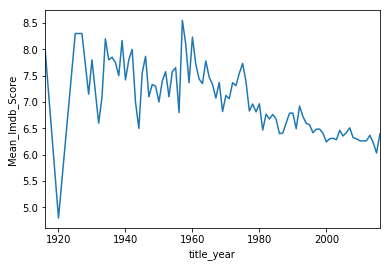

In [3]:
df.groupby('title_year').imdb_score.mean().plot(kind = 'line')   # trend for avg imdb score with time 
plt.ylabel('Mean_Imdb_Score')  # Decreases with time 



Text(0.5,0,u'imdb_score')

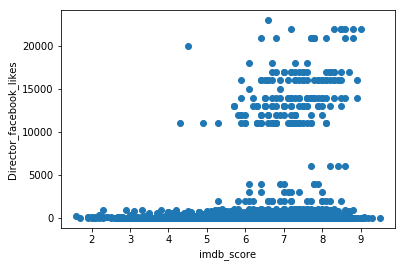

In [4]:
plt.scatter(df.imdb_score,df.director_facebook_likes)  # Directors popularity vs Imdb score of movie 
plt.ylabel("Director_facebook_likes")
plt.xlabel('imdb_score')             # almost no correlation

Text(0,0.5,u'Gross')

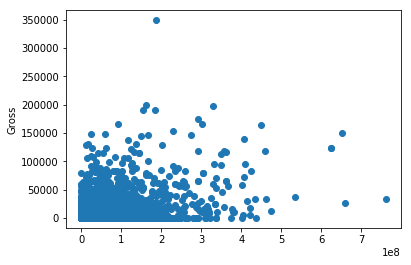

In [5]:
plt.scatter(df.gross,df.movie_facebook_likes)    # Movie popularity vs Gross
plt.ylabel("Movie_facebook_likes")
plt.ylabel("Gross")                              # No correlation 

Text(0,0.5,u'Imdb_mean_score')

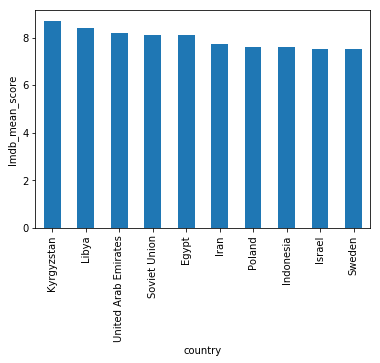

In [6]:
df.groupby('country').imdb_score.mean().sort_values(ascending=False)[0:10].plot(kind = 'bar')  
plt.ylabel("Imdb_mean_score")     # Continent producing good quality movies 
                                  # No correlation

{'boxes': [<matplotlib.lines.Line2D at 0x7f076b74ccd0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f076b75a6d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f076b763310>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f076b75aed0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f076b74ce50>,
  <matplotlib.lines.Line2D at 0x7f076b75a2d0>]}

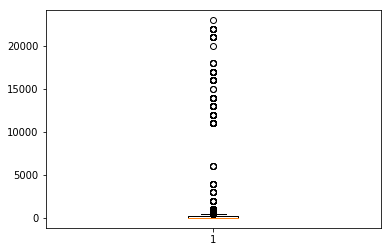

In [7]:
 
plt.boxplot(df.director_facebook_likes)   # Too many outliers in director_facebook_likes data

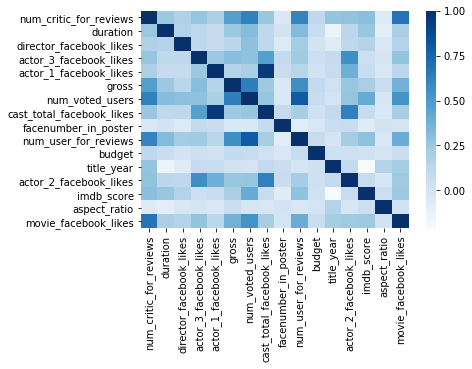

In [8]:
import seaborn as sns           # Heat map for correlation between different features 
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap="Blues")


Text(0,0.5,u'Gross')

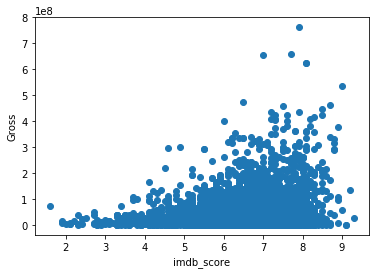

In [9]:
plt.scatter(df.imdb_score,df.gross)         # Imdb score vs Gross 
plt.xlabel("imdb_score")                    # Looks like Negatively skewed Gaussian Distribution 
plt.ylabel("Gross")                        # movies in the range of ratings 6 - 8.5 grossed well 


Text(0,0.5,u'Budget')

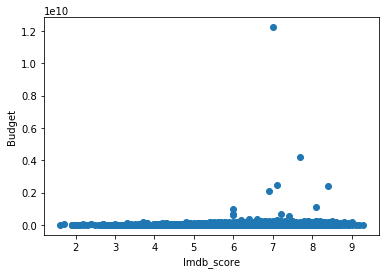

In [10]:
plt.scatter(df.imdb_score,df.budget)        # Budget vs Imdb Score 
plt.xlabel("Imdb_score")
plt.ylabel("Budget")                       # No correlation

Text(0,0.5,u'Gross')

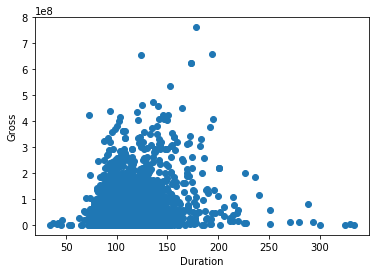

In [11]:
plt.scatter(df.duration,df.gross)       # Duration vs Gross
plt.xlabel("Duration")                  # Looks like Positively skewed Gaussian Distribution
plt.ylabel("Gross")                     # Movies with duration between 75 to 175 minutes grossed good 

Text(0,0.5,u'Duration')

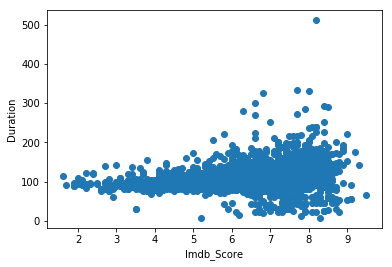

In [12]:
plt.scatter(df.imdb_score,df.duration)     # Duration vs Imdb_Score 
plt.xlabel("Imdb_Score")
plt.ylabel("Duration")                     # No correlation

English       4716
French          73
Spanish         40
Hindi           28
Mandarin        26
German          19
Japanese        18
Cantonese       11
Russian         11
Italian         11
Korean           8
Portuguese       8
Arabic           5
Swedish          5
Hebrew           5
Danish           5
Persian          4
Dutch            4
Polish           4
Norwegian        4
Thai             3
Chinese          3
None             2
Zulu             2
Aboriginal       2
Icelandic        2
Romanian         2
Dari             2
Indonesian       2
Urdu             1
Czech            1
Filipino         1
Tamil            1
Slovenian        1
Swahili          1
Aramaic          1
Greek            1
Hungarian        1
Bosnian          1
Kazakh           1
Panjabi          1
Kannada          1
Mongolian        1
Dzongkha         1
Vietnamese       1
Maya             1
Telugu           1
Name: language, dtype: int64


Text(0,0.5,u'Mean_gross')

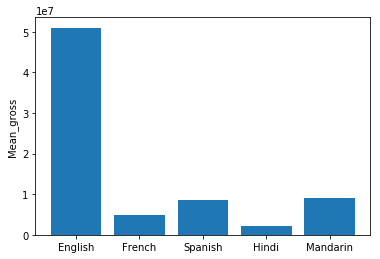

In [14]:
%matplotlib inline                            
#  Mean_gross vs Language of movie 
#  considering  no. of movies per language > 20 
df.language.value_counts()       
print df.language.value_counts()
g = df.groupby("language")

a = g.get_group("English") .gross.mean()
b = g.get_group("Hindi") .gross.mean()
c = g.get_group("Spanish") .gross.mean()
d = g.get_group("French") .gross.mean()
e = g.get_group("Mandarin") .gross.mean()

lang_gross = np.array([a,d,c,b,e])
language_name = ("English","French", "Spanish", "Hindi", "Mandarin")
y_pos = np.arange(len(language_name))
plt.bar(y_pos,lang_gross, align = "center")
plt.xticks(y_pos,language_name)
plt.ylabel("Mean_gross")